<a href="https://colab.research.google.com/github/Homericgalley/Machine_Learning/blob/main/7%EC%A3%BC%EC%B0%A8_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7주차 : Logistic Regression for Classification
* 종속변수 y 가 연속형 숫자(Continuous variables)가 아닌 범주형 데이터(categorical variables)일 때, 
(ex: 암 발생 여부-0이면 정상 1이면 발병)
* 다중선형회귀 모델을 그대로 적용할 수 없음
* 실제 많은 자연, 사회 현상에서는 특정 변수에 대한 확률 값이 선형이 아닌 s-curved 형태를 따르는 경우다 much more.--> 이러한 s-curved를 함수 표현한 형태가 로지스틱 함수/시그모이드 함수(**추가 학습 필요)
#따라서
* Logistic Regresstion 은 DV(종속변수, Dependant Variable)에 약간의 수정을 적용한 Linear Regression!

# Keywords:
# Categorical Variable(범주형 변수)
# Logistic Linear Regression => Multiple Linear Regression 수정한 Version!

# # 실습 예제: Calassification with scikit-learn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer_dataset=load_breast_cancer()

print("cancer_dataset의 키:\n",cancer_dataset.keys())

cancer_dataset의 키:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [14]:
cancer_dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [46]:
import seaborn as sns
cancer_dataset2=sns.load_dataset('breast_cancer')
cancer_dataset2.head()

ValueError: ignored

* '왜 코드가 실행이 안될까...?'
* '실습 예제를 다하고, 나중에 생각해보자...'

In [ ]:
cancer_dataset

{'DESCR': '.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry \n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        largest values) of these features were computed for each image,\n        resulting in 30 features.  For

In [13]:
print(cancer_dataset['data'][:5])

print(cancer_dataset['target_names'])
print(cancer_dataset['feature_names'])


[[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
  1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
  6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
  1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
  4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
  7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
  5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
  2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
  2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 1.203e+03 1.096e-01 1.599e-01 1.974e-01
  1.279e-01 2.069e-01 5.999e-02 7.456e-01 7.869e-01 4.585e+00 9.403e+01
  6.150e-03 4.006e-02 3.832e-02 2.058e-02 2.250e-02 4.571e-03 2.357e+01
  2.553e+01 1.525e+02 1.709e+03 1.444e-01 4.245e-01 4.504e-01 2.430e-01
  3.613e-01 8.758e-02]
 [1.142e+01 2.038e+01 7.758e+01 3.861e+02 1.425e-01 2.839e-01 2.414

* 7주차 강의에서의 '코딩 예제 실습'은 이 설명 아래 문단의 코딩부터 시작 (dataset을 불러오고, test/train 용으로 나누는 과정은 넘어가 있음)
# "당황하지 말고"
# "침착하게"
* 3주차에 학습했던 내용을 적용 -> cancer data를 불러오고 간단히 data 구조를 확인해보자.

* [+] #target_names를 통해 분류되는 이름은 malignant와 benign임을 알 수 있다 
* [+] 그러면 이때 malignant와 benign은 '대체' 무엇일까?
--> 다음 사이트에서 확인할 수 있었다 
https://www.verywellhealth.com/what-does-malignant-and-benign-mean-514240
* [+] malignant는 "cells are not cancerous and won't spread" 다시 말해 암세포가 되지 않은 세포를 말하며 전이되지 않는다. 즉, 멀쩡한 정상세포라는 말이다. 
* [+] benign은 "cells are cancerous and can spread to other tissues and organs" 즉 암세포가 되어버린 세포를 의미하며 다른 조직과 장기에 전이될 수 있는 비정상 암세포를 뜻한다.

* #feature_names를 통해 암인지 암이 아닌지 분류할 때 사용되는 indicator-part 특성들의 이름을 알 수 있었다. 

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer_dataset['data'], cancer_dataset['target'], random_state=0)

* 7주차 강의 예제에서 도입부분에서 생략되어 있던, dataset의 test/train 설정을 마쳤다.

In [30]:
## [Algorithm#2: Logistic Regresion for classification]

from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=5000).fit(X_train,y_train)

print("훈련 세트 점수: {:3f}".format(logreg.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg.score(X_test,y_test)))

# 기본값 C=1으로 적용시,  훈련세트와 테스트 세트 양쪽에 95% 정확도를 보이며 꽤 높은 성능을 나타냄을 볼 수 있음
# 그러나, 훈련세트와 테스트 세트의 성능이 매우 비슷 (it means '과소적합!!') 
# --> 해결책 : 모델의 retulation(제약/규제)를 더 풀어주기 위해 C값을 증가시켜보면 된다.

훈련 세트 점수: 0.960094
테스트 세트 점수: 0.951


* Dataset 불러오기와 Dataset의 spilit이 안적혀있어서 놀람 -> 이전 3주차 강의에도 나와 있는 iris_dataset 불러오기와 수업 스터디 도움 참조.
* Dataset 불러오기/ Dataset 확인/ Dataset 나누기 실행

In [32]:
logreg100=LogisticRegression(C=100,max_iter=50000).fit(X_train,y_train) 
# 이는 C를 증가시킴 => 복잡도를 높인 모델, 성능도 좋음

print("훈련 세트 점수: {:.3f}".format(logreg100.score(X_train,y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg100.score(X_test,y_test)))

훈련 세트 점수: 0.981
테스트 세트 점수: 0.958


* 실제로 출력 값이 이전 설정에서 약 95%에서 현재 설정에서는 약 98%로 수치가 증가하였음.

In [35]:
logreg001=LogisticRegression(C=0.01,max_iter=50000).fit(X_train,y_train)
# 이는 C값을 감소시킴으로써 regularization-규제를 높인 모델이 된다
# 이미 과소적합된 모델에서 규제를 더 높였기에 기본 매개변수 C=1일 때보다 성능이 낮아진다

print("훈련 세트 점수: {:.3f}".format(logreg001.score(X_train, y_train)))
print("테스트 세트 점수: {:.3f}".format(logreg001.score(X_test,y_test)))

훈련 세트 점수: 0.953
테스트 세트 점수: 0.944


# 그래프에 plot으로 data를 나타내어 직관적인 관찰을 해보자

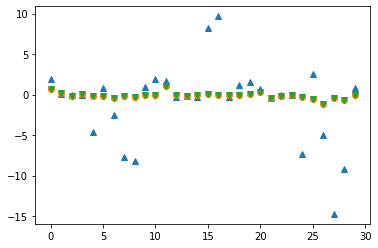

In [36]:
import matplotlib.pyplot as plt
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg.coef_.T, 'v',label="C=0.001")


* 어디선가 코딩의 핵심은 '모듈화' 그리고 '분리'라고 들어서, 예습 코드를 나누어 실행해 보았음.

([<matplotlib.axis.XTick at 0x7f6fd4f4fe50>,
 [Text(0, 0, 'mean radius'),
  Text(0, 0, 'mean texture'),
  Text(0, 0, 'mean perimeter'),
  Text(0, 0, 'mean area'),
  Text(0, 0, 'mean smoothness'),
  Text(0, 0, 'mean compactness'),
  Text(0, 0, 'mean concavity'),
  Text(0, 0, 'mean concave points'),
  Text(0, 0, 'mean symmetry'),
  Text(0, 0, 'mean fractal dimension'),
  Text(0, 0, 'radius error'),
  Text(0, 0, 'texture error'),
  Text(0, 0, 'perimeter error'),
  Text(0, 0, 'area error'),
  Text(0, 0, 'smoothness error'),
  Text(0, 0, 'compactness error'),
  Text(0, 0, 'concavity error'),
  Text(0, 0, 'concave points error'),
  Text(0, 0, 'symmetry error'),
  Text(0, 0, 'fractal dimension error'),
  Text(0, 0, 'worst radius'),
  Text(0, 0, 'worst texture'),
  Text(0, 0, 'worst perimeter'),
  Text(0, 0, 'worst area'),
  Text(0, 0, 'worst smoothness'),
  Text(0, 0, 'worst compactness'),
  Text(0, 0, 'worst concavity'),
  Text(0, 0, 'worst concave points'),
  Text(0, 0, 'worst symmetry'),
 

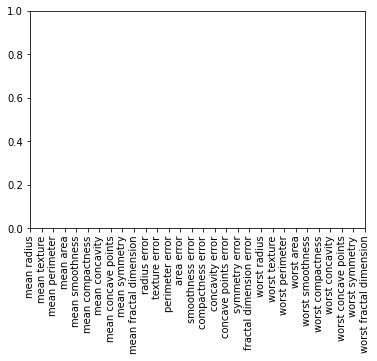

In [52]:
plt.xticks(range(cancer_dataset.data.shape[1]),cancer_dataset.feature_names, rotation=90)

* x축의 0과 1 사이에 -> [1]
* 입력 데이터의 indicator 이름들을 -> cancer_dataset.feature_names
* 90도로 회전한 형태로 출력하라 -> rotation=90

(-5.0, 5.0)

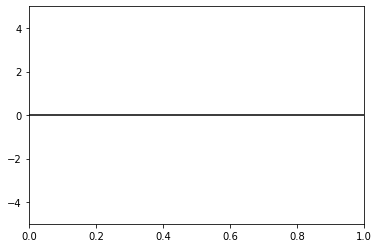

In [41]:
xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1]) #극한으로 진행했을 때의 값을 0과 1사이에서 잡으라는 이야기인가? -> 아래 표를 통해 더 생각해보자.
plt.xlim(xlims)
plt.ylim(-5,5) 

Text(0.5, 0, 'Features')

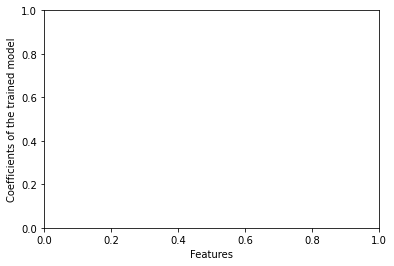

In [42]:
plt.ylabel("Coefficients of the trained model")
plt.xlabel("Features") 

# 아래와 같은 그래프가 출력되는 것을 통해, 이번 코드는 y축과 x축의 이름을 지정해주는 코드임을 알 수 있었다.

No handles with labels found to put in legend.


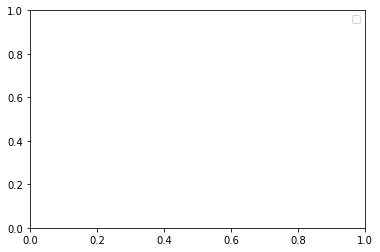

In [43]:
plt.legend()

# 이 코드만을 단독 실행시켜 나온 그래프로는, 구체적으로 무엇을 출력해주는 코드인지 유추할 수 없었다.

* 구글링을 통해, legend는 함수 그래프에 '범례'를 설정해주는 명령어 임을 알 수 있었다 ->https://zephyrus1111.tistory.com/19
* 단 위와 같이 단독으로 코드를 실행시켰을 때에는, 이전에 화면에 나타내길 요청한 코드가 없으므로, 빈그래프만이 출력된다 -> 그렇기에 범례를 구성해줄 수 없다는 '응답'이 출력 된 것! -> "No handles with labels found to put in legend.
<matplotlib.legend.Legend at 0x7f6fd533a210>"


# *코드를 나누어 실행하면 해당 코드가 실행하는 동작을 세분화해 구별하여 학습 할수 있음을 확인.
# *또한 코드를 지나치게 분리하여 작성하면, 원하는 데이터 분석 결과를 나타낼 수 없다는 것도 확인.
* 이제 위에서 분리하여 확인해본 코드들을 합쳐 실행해보자.

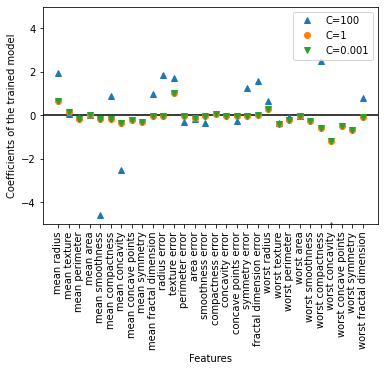

In [44]:
import matplotlib.pyplot as plt
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg.coef_.T, 'v',label="C=0.001")

plt.xticks(range(cancer_dataset.data.shape[1]),cancer_dataset.feature_names, rotation=90)

xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5) 

plt.ylabel("Coefficients of the trained model")
plt.xlabel("Features") 

plt.legend()

#무엇인가 잘못되었음을 알수 있다.
* 강의 화면에서 출력되는 예시 문제 그래프는 위의 그래프와 모양이 다르다. 
* 즉, V (역삼각형)으로 출력하기로 코딩 된 C=0.001로 설정한 데이터가 강의에서 나오는 그래프와 달리 y=0에 가까이 수렴하지 않고, C=1의 값으로 설정한 그래프의 plot들과 겹쳐지고 있음을 알 수있다.
-> 코드를 다시 확인해 본 결과 'logreg001'로 적어야 할 곳에 logreg.coef라고 적었음을 확인할 수 있었다.
# 틀린 코드 부분을 고쳐서, 다시 입력한 코드를 실행해보자

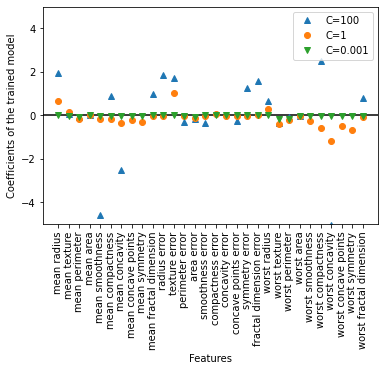

In [45]:
import matplotlib.pyplot as plt
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg.coef_.T,'o',label="C=1")
plt.plot(logreg001.coef_.T, 'v',label="C=0.001")

plt.xticks(range(cancer_dataset.data.shape[1]),cancer_dataset.feature_names, rotation=90)

xlims=plt.xlim()
plt.hlines(0,xlims[0],xlims[1])
plt.xlim(xlims)
plt.ylim(-5,5) 

plt.ylabel("Coefficients of the trained model")
plt.xlabel("Features") 

plt.legend()

# # 수업 강의 화면에서 보이는 예제의 그래프와 동일한 그래프가 출력되었음을 확인할 수 있다.
# # Mission success.

* C값은 자신이 선택한 연구의 주제 그리고 연구 데이터에 따라 어느 값이 적절한지 다르다.